In [1]:
import numpy as np  
import matplotlib.pyplot as plt 

In [4]:
def logistic_function(x, slope, midpoint, scale):
    """Takes slope max and midpoint.  """
    val = scale / (1 + np.exp(slope * (x - midpoint)))
    return val   
    

In [5]:
param1_TRPaging= 3.53276388
param2_TRPaging= 5.99745537
param3_TRPaging= 0.29658879

In [8]:
hkt = np.arange(0, 0.5, 0.01)
mat_time = logistic_function(hkt, param2_TRPaging, param3_TRPaging, param1_TRPaging)    

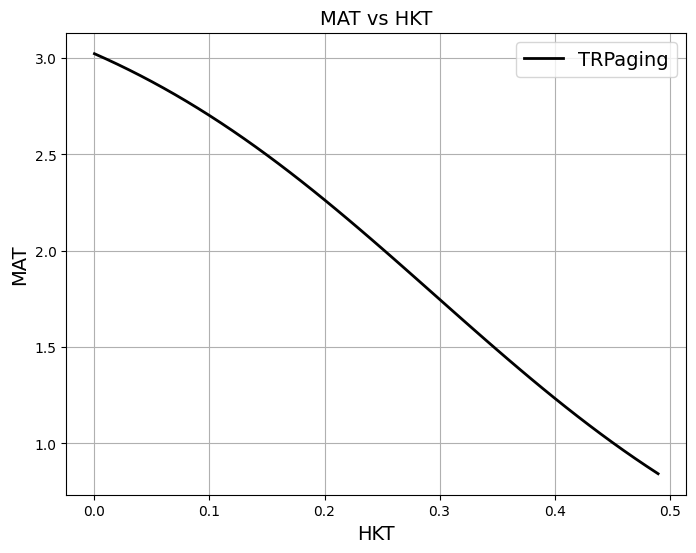

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(hkt, mat_time, color='black', linewidth=2, label='TRPaging')
ax.set_xlabel('HKT', fontsize=14)
ax.set_ylabel('MAT', fontsize=14)
ax.set_title('MAT vs HKT', fontsize=14)
ax.grid(True)
ax.legend(loc='best', fontsize=14)
plt.show()